# Basic Neural Network
- Author: Minh Nguyen
- 4/25/2021
- Pytorch Classifier - train and test on Imagenette: https://github.com/mnguyen0226/imagenette
- Note on Pytorch Installation: https://pytorch.org/

Note about labels - using 320 px dataset. Train and validate on noisy_label_0 
- n01440764: Tench
- n02102040: English Springer
- n02979186: Cassette Player
- n03000684: Chain Saw
- n03028079: Church
- n03394916: French Horn
- n03417042: Garbage Truck
- n03425413: Gas Pump
- n03445777: Golf Ball
- n03888257: Parachute

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
from PIL import Image
import csv
import matplotlib.image as mpimg

In [9]:
# Read in the path from csv
DATA_PATH = './imagenette2-320'

with open('./imagenette2-320/noisy_imagenette.csv', mode = 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}') # Print out the first line
            line_count += 1
        print(f"\t{row['path']} and label is {row['noisy_labels_0']}")
        line_count += 1
    print(f"Processed {line_count} lines")

Column names are path, noisy_labels_0, noisy_labels_1, noisy_labels_5, noisy_labels_25, noisy_labels_50, is_valid
	train/n02979186/n02979186_9036.JPEG and label is n02979186
	train/n02979186/n02979186_11957.JPEG and label is n02979186
	train/n02979186/n02979186_9715.JPEG and label is n02979186
	train/n02979186/n02979186_21736.JPEG and label is n02979186
	train/n02979186/ILSVRC2012_val_00046953.JPEG and label is n02979186
	train/n02979186/n02979186_10568.JPEG and label is n02979186
	train/n02979186/n02979186_2745.JPEG and label is n02979186
	train/n02979186/n02979186_3529.JPEG and label is n02979186
	train/n02979186/n02979186_10756.JPEG and label is n02979186
	train/n02979186/n02979186_7058.JPEG and label is n02979186
	train/n02979186/n02979186_12419.JPEG and label is n02979186
	train/n02979186/n02979186_27479.JPEG and label is n02979186
	train/n02979186/n02979186_2733.JPEG and label is n02979186
	train/n02979186/n02979186_23069.JPEG and label is n02979186
	train/n02979186/n02979186_246

	train/n03417042/n03417042_15913.JPEG and label is n03417042
	train/n03417042/n03417042_14777.JPEG and label is n03417042
	train/n03417042/ILSVRC2012_val_00031313.JPEG and label is n03417042
	train/n03417042/n03417042_5208.JPEG and label is n03417042
	train/n03417042/n03417042_15198.JPEG and label is n03417042
	train/n03417042/n03417042_17545.JPEG and label is n03417042
	train/n03417042/n03417042_27486.JPEG and label is n03417042
	train/n03417042/n03417042_5136.JPEG and label is n03417042
	train/n03417042/n03417042_10677.JPEG and label is n03417042
	train/n03417042/n03417042_17684.JPEG and label is n03417042
	train/n03417042/n03417042_7313.JPEG and label is n03417042
	train/n03417042/n03417042_4528.JPEG and label is n03417042
	train/n03417042/n03417042_1793.JPEG and label is n03417042
	train/n03417042/n03417042_9829.JPEG and label is n03417042
	train/n03417042/n03417042_20713.JPEG and label is n03417042
	train/n03417042/n03417042_1978.JPEG and label is n03417042
	train/n03417042/n03417

	train/n01440764/n01440764_2098.JPEG and label is n01440764
	train/n01440764/n01440764_27183.JPEG and label is n01440764
	train/n01440764/n01440764_1764.JPEG and label is n01440764
	train/n01440764/n01440764_31406.JPEG and label is n01440764
	train/n01440764/n01440764_9898.JPEG and label is n01440764
	train/n01440764/n01440764_12468.JPEG and label is n01440764
	train/n01440764/n01440764_9523.JPEG and label is n01440764
	train/n01440764/n01440764_5687.JPEG and label is n01440764
	train/n01440764/n01440764_10026.JPEG and label is n01440764
	train/n01440764/ILSVRC2012_val_00018317.JPEG and label is n01440764
	train/n01440764/n01440764_1995.JPEG and label is n01440764
	train/n01440764/n01440764_14893.JPEG and label is n01440764
	train/n01440764/n01440764_30188.JPEG and label is n01440764
	train/n01440764/n01440764_11424.JPEG and label is n01440764
	train/n01440764/n01440764_4688.JPEG and label is n01440764
	train/n01440764/n01440764_12708.JPEG and label is n01440764
	train/n01440764/n01440

	train/n03028079/n03028079_11119.JPEG and label is n03028079
	train/n03028079/n03028079_883.JPEG and label is n03028079
	train/n03028079/n03028079_9755.JPEG and label is n03028079
	train/n03028079/n03028079_8815.JPEG and label is n03028079
	train/n03028079/n03028079_118345.JPEG and label is n03028079
	train/n03028079/n03028079_1967.JPEG and label is n03028079
	train/n03028079/n03028079_419.JPEG and label is n03028079
	train/n03028079/n03028079_7888.JPEG and label is n03028079
	train/n03028079/n03028079_53715.JPEG and label is n03028079
	train/n03028079/n03028079_1475.JPEG and label is n03028079
	train/n03028079/n03028079_7878.JPEG and label is n03028079
	train/n03028079/n03028079_25989.JPEG and label is n03028079
	train/n03028079/n03028079_3064.JPEG and label is n03028079
	train/n03028079/n03028079_16488.JPEG and label is n03028079
	train/n03028079/n03028079_46908.JPEG and label is n03028079
	train/n03028079/n03028079_4174.JPEG and label is n03028079
	train/n03028079/n03028079_8805.JPE

	train/n03888257/n03888257_8089.JPEG and label is n03888257
	train/n03888257/n03888257_63675.JPEG and label is n03888257
	train/n03888257/n03888257_72425.JPEG and label is n03888257
	train/n03888257/n03888257_63169.JPEG and label is n03888257
	train/n03888257/n03888257_7526.JPEG and label is n03888257
	train/n03888257/n03888257_3595.JPEG and label is n03888257
	train/n03888257/n03888257_6336.JPEG and label is n03888257
	train/n03888257/n03888257_17708.JPEG and label is n03888257
	train/n03888257/n03888257_1175.JPEG and label is n03888257
	train/n03888257/n03888257_22767.JPEG and label is n03888257
	train/n03888257/n03888257_34737.JPEG and label is n03888257
	train/n03888257/n03888257_11477.JPEG and label is n03888257
	train/n03888257/n03888257_23297.JPEG and label is n03888257
	train/n03888257/n03888257_20624.JPEG and label is n03888257
	train/n03888257/n03888257_2747.JPEG and label is n03888257
	train/n03888257/n03888257_23048.JPEG and label is n03888257
	train/n03888257/n03888257_166

	train/n03000684/n03000684_19289.JPEG and label is n03000684
	train/n03000684/n03000684_1119.JPEG and label is n03000684
	train/n03000684/n03000684_5368.JPEG and label is n03000684
	train/n03000684/n03000684_10624.JPEG and label is n03000684
	train/n03000684/n03000684_16884.JPEG and label is n03000684
	train/n03000684/n03000684_7225.JPEG and label is n03000684
	train/n03000684/n03000684_14817.JPEG and label is n03000684
	train/n03000684/n03000684_6217.JPEG and label is n03000684
	train/n03000684/n03000684_17254.JPEG and label is n03000684
	train/n03000684/n03000684_8864.JPEG and label is n03000684
	train/n03000684/n03000684_17178.JPEG and label is n03000684
	train/n03000684/n03000684_20243.JPEG and label is n03000684
	train/n03000684/n03000684_11515.JPEG and label is n03000684
	train/n03000684/n03000684_2907.JPEG and label is n03000684
	train/n03000684/n03000684_22586.JPEG and label is n03000684
	train/n03000684/n03000684_30989.JPEG and label is n03000684
	train/n03000684/n03000684_207

	train/n03445777/n03445777_17293.JPEG and label is n03445777
	train/n03445777/n03445777_6383.JPEG and label is n03445777
	train/n03445777/n03445777_4814.JPEG and label is n03445777
	train/n03445777/n03445777_8026.JPEG and label is n03445777
	train/n03445777/n03445777_2967.JPEG and label is n03445777
	train/n03445777/n03445777_15875.JPEG and label is n03445777
	train/n03445777/n03445777_20319.JPEG and label is n03445777
	train/n03445777/n03445777_8016.JPEG and label is n03445777
	train/n03445777/n03445777_1275.JPEG and label is n03445777
	train/n03445777/n03445777_10499.JPEG and label is n03445777
	train/n03445777/n03445777_7557.JPEG and label is n03445777
	train/n03445777/n03445777_6539.JPEG and label is n03445777
	train/n03445777/n03445777_10615.JPEG and label is n03445777
	train/n03445777/n03445777_8343.JPEG and label is n03445777
	train/n03445777/n03445777_7178.JPEG and label is n03445777
	train/n03445777/n03445777_7939.JPEG and label is n03445777
	train/n03445777/n03445777_3505.JPE

	train/n03425413/n03425413_13069.JPEG and label is n03425413
	train/n03425413/n03425413_13018.JPEG and label is n03425413
	train/n03425413/n03425413_19956.JPEG and label is n03425413
	train/n03425413/n03425413_20978.JPEG and label is n03425413
	train/n03425413/n03425413_21455.JPEG and label is n03425413
	train/n03425413/n03425413_10143.JPEG and label is n03425413
	train/n03425413/n03425413_15063.JPEG and label is n03425413
	train/n03425413/n03425413_19733.JPEG and label is n03425413
	train/n03425413/n03425413_5343.JPEG and label is n03425413
	train/n03425413/n03425413_15429.JPEG and label is n03425413
	train/n03425413/n03425413_7794.JPEG and label is n03425413
	train/n03425413/n03425413_27486.JPEG and label is n03425413
	train/n03425413/n03425413_9723.JPEG and label is n03425413
	train/n03425413/n03425413_14398.JPEG and label is n03425413
	train/n03425413/ILSVRC2012_val_00006909.JPEG and label is n03425413
	train/n03425413/ILSVRC2012_val_00006434.JPEG and label is n03425413
	train/n034

	val/n02102040/n02102040_940.JPEG and label is n02102040
	val/n02102040/n02102040_4960.JPEG and label is n02102040
	val/n02102040/n02102040_2961.JPEG and label is n02102040
	val/n02102040/n02102040_3450.JPEG and label is n02102040
	val/n02102040/n02102040_1081.JPEG and label is n02102040
	val/n02102040/n02102040_352.JPEG and label is n02102040
	val/n02102040/n02102040_142.JPEG and label is n02102040
	val/n02102040/ILSVRC2012_val_00026521.JPEG and label is n02102040
	val/n02102040/n02102040_562.JPEG and label is n02102040
	val/n02102040/n02102040_450.JPEG and label is n02102040
	val/n02102040/n02102040_7130.JPEG and label is n02102040
	val/n02102040/n02102040_251.JPEG and label is n02102040
	val/n02102040/n02102040_791.JPEG and label is n02102040
	val/n02102040/n02102040_1310.JPEG and label is n02102040
	val/n02102040/n02102040_2941.JPEG and label is n02102040
	val/n02102040/n02102040_8150.JPEG and label is n02102040
	val/n02102040/n02102040_6050.JPEG and label is n02102040
	val/n021020

	val/n03394916/n03394916_32870.JPEG and label is n03394916
	val/n03394916/n03394916_33291.JPEG and label is n03394916
	val/n03394916/n03394916_29091.JPEG and label is n03394916
	val/n03394916/n03394916_29500.JPEG and label is n03394916
	val/n03394916/n03394916_26252.JPEG and label is n03394916
	val/n03394916/n03394916_37762.JPEG and label is n03394916
	val/n03394916/n03394916_1592.JPEG and label is n03394916
	val/n03394916/n03394916_35292.JPEG and label is n03394916
	val/n03394916/n03394916_47560.JPEG and label is n03394916
	val/n03394916/n03394916_38830.JPEG and label is n03394916
	val/n03394916/n03394916_5200.JPEG and label is n03394916
	val/n03394916/n03394916_29412.JPEG and label is n03394916
	val/n03394916/n03394916_22791.JPEG and label is n03394916
	val/n03394916/n03394916_27071.JPEG and label is n03394916
	val/n03394916/n03394916_23222.JPEG and label is n03394916
	val/n03394916/n03394916_28461.JPEG and label is n03394916
	val/n03394916/n03394916_17100.JPEG and label is n03394916

	val/n03425413/n03425413_11102.JPEG and label is n03425413
	val/n03425413/n03425413_20312.JPEG and label is n03425413
	val/n03425413/n03425413_9791.JPEG and label is n03425413
	val/n03425413/n03425413_13741.JPEG and label is n03425413
	val/n03425413/n03425413_2951.JPEG and label is n03425413
	val/n03425413/n03425413_15792.JPEG and label is n03425413
	val/n03425413/n03425413_20680.JPEG and label is n03425413
	val/n03425413/n03425413_3241.JPEG and label is n03425413
	val/n03425413/n03425413_21040.JPEG and label is n03425413
	val/n03425413/n03425413_13100.JPEG and label is n03425413
	val/n03425413/n03425413_20301.JPEG and label is n03425413
	val/n03425413/n03425413_13200.JPEG and label is n03425413
	val/n03425413/n03425413_12921.JPEG and label is n03425413
	val/n03425413/n03425413_8622.JPEG and label is n03425413
	val/n03425413/n03425413_13270.JPEG and label is n03425413
	val/n03425413/n03425413_8542.JPEG and label is n03425413
	val/n03425413/n03425413_12672.JPEG and label is n03425413
	v

./imagenette2-320/train/n02979186/n02979186_9036.JPEG


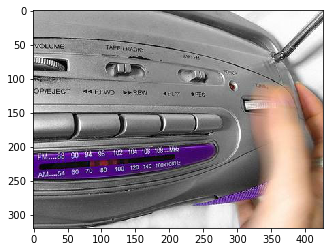

./imagenette2-320/train/n02979186/n02979186_11957.JPEG


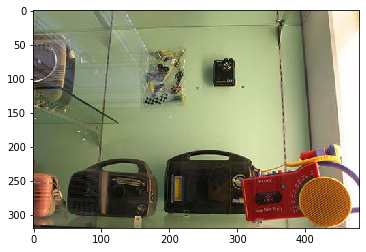

./imagenette2-320/train/n02979186/n02979186_9715.JPEG


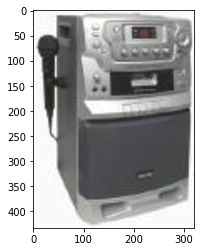

./imagenette2-320/train/n02979186/n02979186_21736.JPEG


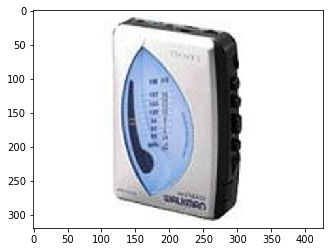

./imagenette2-320/train/n02979186/ILSVRC2012_val_00046953.JPEG


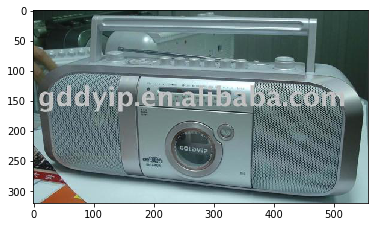

In [25]:
# print out image from path
with open('./imagenette2-320/noisy_imagenette.csv', mode = 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    i = 0
    for row in csv_reader:
        # access that path, then open the image
        img_path = row['path']
        img_path = './imagenette2-320/' + img_path # Get the correct image path
        
        print(img_path)
        img = mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()
        if(i == 4): # print out 5 image
            break
        i = i + 1

In [3]:
# Load and normalize CIFAR 10 Training and Testing dataset using torchvision.

# Convert image into Tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size, shuffle = True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


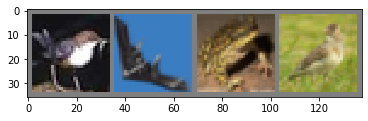

 bird plane  frog  bird


In [8]:
# Show training image
def imshow(img):
    img = img / 2 + 0.5 # unormalize
    npimg = img.numpy() # convert to numpy
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
im, label = dataiter.next()

imshow(torchvision.utils.make_grid(im))
print(' '.join('%5s' % classes[label[j]] for j in range(batch_size)))

In [12]:
# Defind a CNN
class Net(nn.Module):
    def __init__(self): # define layers
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x): # defind feedforward fucntion
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [13]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
# Defind a loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
# Train a Neural Network: feed training image to the network and optimize
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get [inputs, labels]
        inputs, labels = data
        
        # zero the param gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print stat for evaluation
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


C:\Users\nguye\anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


[1,  2000] loss: 2.210
[1,  4000] loss: 1.935
[1,  6000] loss: 1.736
[1,  8000] loss: 1.600
[1, 10000] loss: 1.535
[1, 12000] loss: 1.466
[2,  2000] loss: 1.406
[2,  4000] loss: 1.369
[2,  6000] loss: 1.330
[2,  8000] loss: 1.324
[2, 10000] loss: 1.292
[2, 12000] loss: 1.255
Finished Training


In [18]:
# Save Model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


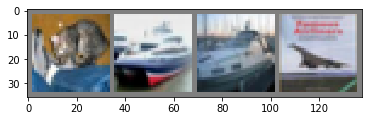

GroundTruth:    cat  ship  ship plane


In [24]:
# Test Network on the testing data - small dataset
dataiter = iter(testloader)
images, labels = dataiter.next() # Testing images and labels

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
# Load the saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [26]:
outputs = net(images) # testing labels

In [27]:
# The output has 10 class, so printout the one with the highest prediction rate
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car   car plane


In [36]:
# Test Network on the whole dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += label.size(0) # each batch has 4 images, thus the label.size(0) = 4
        correct += (predicted == labels).sum().item() 
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 53 %


In [38]:
# Further Evaluation on which class is classified well and which is not
class_correct = list(0. for i in range(10)) # list of 10 class correct
class_total = list(0. for i in range(10)) # list of 10 class total for tracking

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4): 
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 80 %
Accuracy of  bird : 53 %
Accuracy of   cat : 26 %
Accuracy of  deer : 45 %
Accuracy of   dog : 66 %
Accuracy of  frog : 58 %
Accuracy of horse : 51 %
Accuracy of  ship : 50 %
Accuracy of truck : 38 %
